In [26]:
import pandas as pd

# Clean data

In [57]:
data = pd.read_csv('/media/jess/DATA/PhD/cnn_bakeoff2/outputs/model_results.csv')
data['number_of_images'] = data['number_of_images'].astype(float)
data['fold'] = data['fold'].astype(float)
data['mAP'] = data['mAP'].astype(float)
data

,number_of_images,model,fold,class,mAP,augmented,keep
0,10.0,yolov8n,1.0,all,0.243,No,Yes
1,10.0,yolov8n,2.0,all,0.420,No,Yes
2,10.0,yolov8n,3.0,all,0.914,No,Yes
3,10.0,yolov8n,4.0,all,0.944,No,Yes
4,10.0,yolov8n,5.0,all,0.995,No,Yes
...,...,...,...,...,...,...,...
395,100.0,yolov8x,1.0,all,0.647,Yes,Yes
396,100.0,yolov8x,2.0,all,0.775,Yes,Yes
397,100.0,yolov8x,3.0,all,0.727,Yes,Yes
398,100.0,yolov8x,4.0,all,0.762,Yes,Yes


In [58]:
#rid the old results
data = data[data['keep']=='Yes']

## Get mean from each model

In [60]:
import numpy as np

data_stats = data.groupby(['augmented', 'number_of_images', 'model']).agg(mean=('mAP', 'mean'), sd=('mAP', 'std')).reset_index()
data_stats

,augmented,number_of_images,model,mean,sd
0,No,10.0,yolov8l,0.4940,0.182041
1,No,10.0,yolov8m,0.6368,0.266911
2,No,10.0,yolov8n,0.7032,0.346249
3,No,10.0,yolov8s,0.7596,0.241036
4,No,10.0,yolov8x,0.4592,0.161300
5,No,20.0,yolov8l,0.4790,0.097553
6,No,20.0,yolov8m,0.7176,0.111760
7,No,20.0,yolov8n,0.9290,0.147580
8,No,20.0,yolov8s,0.7818,0.154896
9,No,20.0,yolov8x,0.5228,0.062315


In [61]:
data_before_aug = data_stats[data_stats['augmented']=='No']
data_before_aug

,augmented,number_of_images,model,mean,sd
0,No,10.0,yolov8l,0.4940,0.182041
1,No,10.0,yolov8m,0.6368,0.266911
2,No,10.0,yolov8n,0.7032,0.346249
3,No,10.0,yolov8s,0.7596,0.241036
4,No,10.0,yolov8x,0.4592,0.161300
5,No,20.0,yolov8l,0.4790,0.097553
6,No,20.0,yolov8m,0.7176,0.111760
7,No,20.0,yolov8n,0.9290,0.147580
8,No,20.0,yolov8s,0.7818,0.154896
9,No,20.0,yolov8x,0.5228,0.062315


In [62]:
data_after_aug = data_stats[data_stats['number_of_images']<250]
data_after_aug

,augmented,number_of_images,model,mean,sd
0,No,10.0,yolov8l,0.4940,0.182041
1,No,10.0,yolov8m,0.6368,0.266911
2,No,10.0,yolov8n,0.7032,0.346249
3,No,10.0,yolov8s,0.7596,0.241036
4,No,10.0,yolov8x,0.4592,0.161300
5,No,20.0,yolov8l,0.4790,0.097553
6,No,20.0,yolov8m,0.7176,0.111760
7,No,20.0,yolov8n,0.9290,0.147580
8,No,20.0,yolov8s,0.7818,0.154896
9,No,20.0,yolov8x,0.5228,0.062315


# Plots

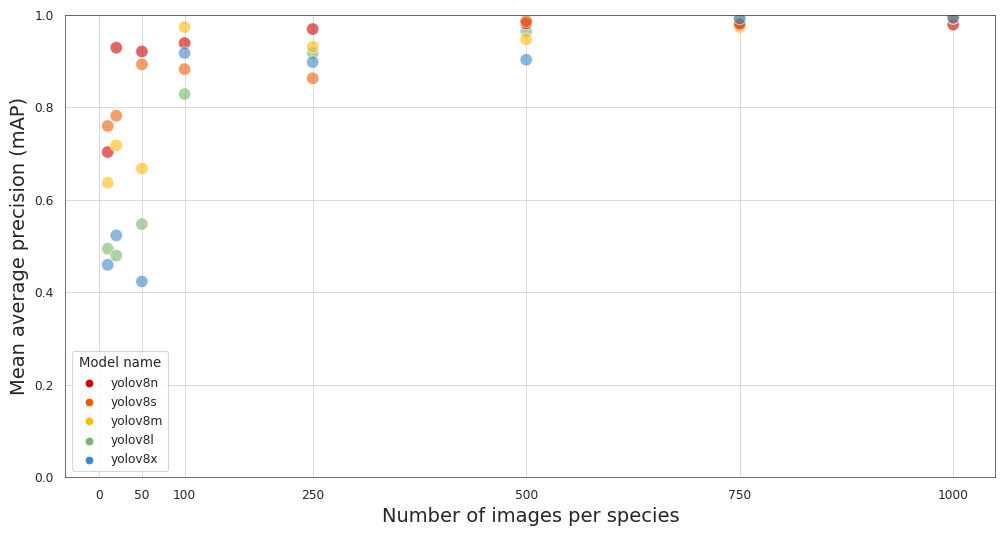

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import fontManager, FontProperties

#theme
sns.set_style('whitegrid', {
    'axes.edgecolor': '0.2'
})
sns.set_context('paper', rc={
    'axes.linewidth': '0.5',
    'grid.linewidth': '0.5',
    'grid.color': '0.9'
})

#increase figure size
plt.figure(figsize = (12, 6))

#palette
palette = ['#D00000', '#E85D04', '#FFBA08', '#7BB567', '#3F88C5']

#scatter plot
sns.scatterplot(
    data=data_stats,
    x=data_stats['number_of_images'],
    y=data_stats['mean'],
    hue='model',
    hue_order=[
        'yolov8n', 'yolov8s', 'yolov8m', 'yolov8l', 'yolov8x'
    ],
    palette=palette,
    s=80,
    alpha=0.6
)

#set limits
plt.ylim(0, 1)

#set axes
plt.xlabel(
    'Number of images per species',
    fontsize = 14
)
plt.ylabel(
    'Mean average precision (mAP)',
    fontsize = 14
)
plt.xticks([0, 50, 100, 250, 500, 750, 1000])

# sns.despine())

#legend settings
plt.legend(
    title='Model name',
    # title_fontsize='x-large',
    # labels=[
    #     'YOLOv8 nano',
    #     'YOLOv8 small',
    #     'YOLOv8 medium',
    #     'YOLOv8 large',
    #     'YOLOv8 X'
    # ],
    # fontsize='large',
    # shadow=True
)

#save plot
# plt.savefig("outputs/map_only.pdf", bbox_inches='tight')
    
#show plot
plt.show()

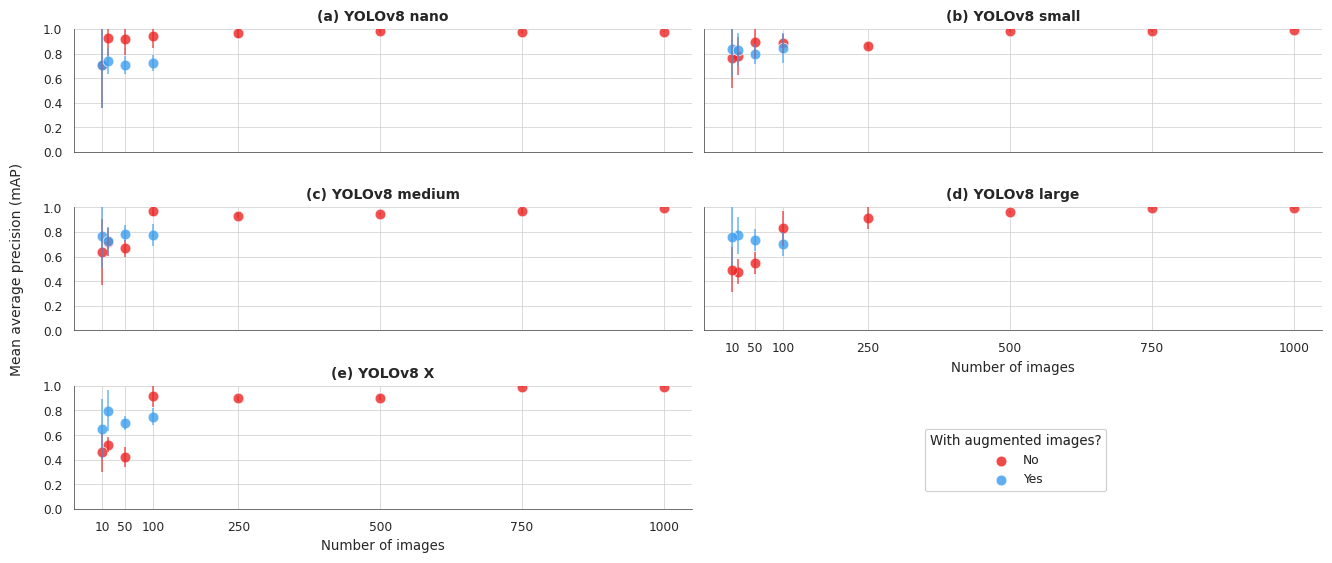

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


#theme
sns.set_style('whitegrid', {
    'axes.edgecolor': '0.2'
})
sns.set_context('paper', rc={
    'axes.linewidth': '0.5',
    'grid.linewidth': '0.5',
    'grid.color': '0.9'
})

#palette
palette = ['#EC2424', '#3F9FEE']

#x axis tick marks
xticks = [
    10,
    50,
    100,
    250,
    500,
    750,
    1000
]

hue_order = [
    'yolov8n',
    'yolov8s',
    'yolov8m',
    'yolov8l',
    'yolov8x'
]

labels = [
    'YOLOv8 nano',
    'YOLOv8 small',
    'YOLOv8 medium',
    'YOLOv8 large',
    'YOLOv8 X'
]

# Ensure the order of models is respected in the DataFrame
data_stats['model'] = pd.Categorical(data_stats['model'], categories=hue_order, ordered=True)
data_stats = data_stats.sort_values('model')

#initialise the grid and add subplots
p = sns.FacetGrid(
    data=data_stats,
    hue='augmented',
    palette=palette,
    legend_out=True,
    col='model',
    col_wrap=2,
    height=2,
    aspect=4/1
)

#add scatterplot
p.map(
    sns.scatterplot,
    'number_of_images',
    'mean',
    s=60,
    alpha=0.8
)

#error bars
augmented_to_colour = {value: palette[idx] for idx, value in enumerate(data_stats['augmented'].unique())}
for ax in p.axes.flat:
    model = ax.get_title().split('=')[-1].strip()
    data_subset = data_stats[data_stats['model'] == model]
    augmented_groups = data_subset.groupby('augmented')
    for name, group in augmented_groups:
        colour = augmented_to_colour[name]  # Get corresponding color for the group
        ax.errorbar(group['number_of_images'], group['mean'], yerr=group['sd'], fmt='none', ecolor=colour, alpha=0.7)

#set titles
titles = ['(a) YOLOv8 nano', '(b) YOLOv8 small', '(c) YOLOv8 medium', '(d) YOLOv8 large', '(e) YOLOv8 X']
for ax, title in zip(p.axes.flat, titles):
    ax.set_title(title, fontweight = 'bold', fontsize=10)

#set axes
p.set_axis_labels('Number of images', '')
p.set(
    ylim=(0,1),
    xticks=xticks
)
plt.subplots_adjust(left=0.12, right=0.9, top=0.9, bottom=0.1)
p.fig.text(0.08, 0.5, 'Mean average precision (mAP)', va='center', rotation='vertical', fontsize=10)

#legend
legend = p.axes.flat[0].legend(title='With augmented images?', loc='upper right', bbox_to_anchor=(1.68, -2.2))
p.axes.flat[0].add_artist(legend)

#save plot
plt.savefig("/media/jess/DATA/PhD/cnn_bakeoff2/outputs/facet_plot.pdf", bbox_inches='tight')
    
#show plot
plt.show()

# Anova

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Check fold dependancy
So this actually doesn't matter since I'm reporting the mean mAP anyway, so the effect from fold should be averaged out.

In [131]:
mod = ols('mAP ~ C(fold)', data=data).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)
print(mod.summary())

             sum_sq     df         F        PR(>F)
C(fold)    1.759719    4.0  9.801014  1.860080e-07
Residual  13.241415  295.0       NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                    mAP   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     9.801
Date:                Wed, 22 May 2024   Prob (F-statistic):           1.86e-07
Time:                        15:28:09   Log-Likelihood:                 42.383
No. Observations:                 300   AIC:                            -74.77
Df Residuals:                     295   BIC:                            -56.25
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t

In [8]:
mod = ols('mAP ~ C(augmented) + C(number_of_images) + C(model)', data=data).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)
print(mod.summary())

                       sum_sq     df          F        PR(>F)
C(augmented)         0.225658    1.0  10.669174  1.221548e-03
C(number_of_images)  5.231018    7.0  35.332063  2.099531e-35
C(model)             1.391558    4.0  16.448336  3.804724e-12
Residual             6.070174  287.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                    mAP   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     35.19
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.78e-49
Time:                        14:48:59   Log-Likelihood:                 159.38
No. Observations:                 300   AIC:                            -292.8
Df Residuals:                     287   BIC:                            -244.6
Df Model:                          12                     

In [7]:
mod = ols('mAP ~ C(augmented) + C(number_of_images) + C(model) + C(fold)', data=data).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)
print(mod.summary())

                       sum_sq     df          F        PR(>F)
C(augmented)         0.225658    1.0  14.815400  1.466110e-04
C(number_of_images)  5.231018    7.0  49.062718  2.464862e-45
C(model)             1.391558    4.0  22.840446  2.278556e-16
C(fold)              1.759719    4.0  28.883299  3.850461e-20
Residual             4.310454  283.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                    mAP   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     43.87
Date:                Thu, 23 May 2024   Prob (F-statistic):           6.02e-67
Time:                        14:24:13   Log-Likelihood:                 210.73
No. Observations:                 300   AIC:                            -387.5
Df Residuals:                     283   BIC:                            -32

## Models

In [54]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

def check_residuals(model):

    # Calculate residuals
    residuals = model.resid

    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.plot(residuals, marker='o', linestyle='none')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals Plot')
    plt.xlabel('Observation')
    plt.ylabel('Residual')
    plt.show()

    # Plot residuals vs. fitted values
    fitted = mod.fittedvalues
    plt.figure(figsize=(10, 6))
    plt.scatter(fitted, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals vs. Fitted Values')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.show()

    # QQ plot to check normality
    sm.qqplot(residuals, line='45')
    plt.title('QQ Plot')
    plt.show()

    # Summary statistics for residuals
    print(residuals.describe())

In [80]:
mod1 = ols('mean ~ C(number_of_images) + C(model)', data=data_before_aug).fit()
anova_table = sm.stats.anova_lm(mod1, typ=2)
print(anova_table)
print(mod1.summary())

                       sum_sq    df          F        PR(>F)
C(number_of_images)  0.829787   7.0  12.921096  2.698715e-07
C(model)             0.159962   4.0   4.359022  7.259541e-03
Residual             0.256878  28.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     9.808
Date:                Mon, 27 May 2024   Prob (F-statistic):           5.79e-07
Time:                        15:18:34   Log-Likelihood:                 44.203
No. Observations:                  40   AIC:                            -64.41
Df Residuals:                      28   BIC:                            -44.14
Df Model:                          11                                         
Covariance Type:            nonrobust        

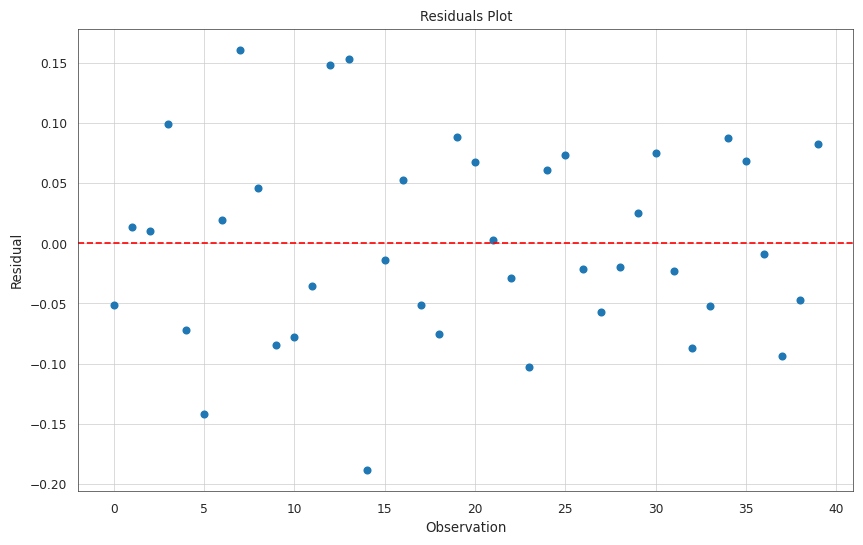

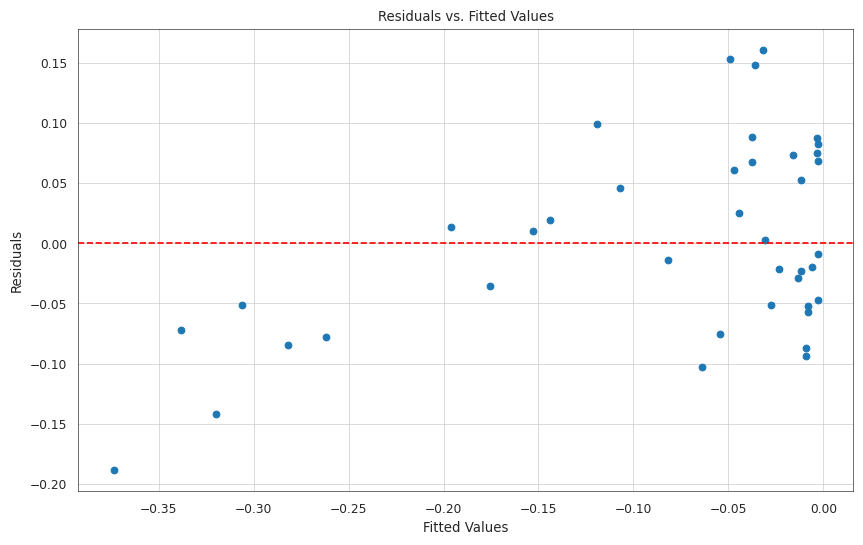

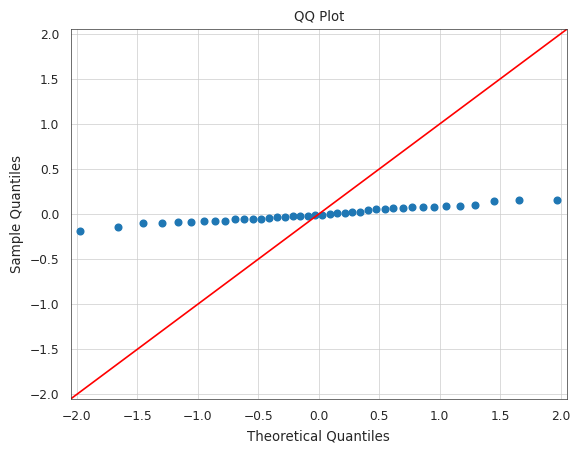

count    4.000000e+01
mean    -3.747003e-17
std      8.115798e-02
min     -1.882450e-01
25%     -5.342750e-02
50%     -1.150750e-02
75%      6.745000e-02
max      1.605850e-01
dtype: float64


In [81]:
check_residuals(mod1)

In [99]:
#the above model needs logging!!
data_before_aug['log_mean'] = np.log10(data_before_aug['mean'])
mod2 = ols('log_mean ~ C(number_of_images) + C(model)', data=data_before_aug).fit()
anova_table = sm.stats.anova_lm(mod2, typ=2)
print(anova_table)
print(mod2.summary())

                       sum_sq    df          F    PR(>F)
C(number_of_images)  0.285305   7.0  10.103422  0.000003
C(model)             0.069359   4.0   4.298317  0.007768
Residual             0.112954  28.0        NaN       NaN
                            OLS Regression Results                            
Dep. Variable:               log_mean   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     7.992
Date:                Mon, 27 May 2024   Prob (F-statistic):           4.44e-06
Time:                        15:50:52   Log-Likelihood:                 60.636
No. Observations:                  40   AIC:                            -97.27
Df Residuals:                      28   BIC:                            -77.00
Df Model:                          11                                         
Covariance Type:            nonrobust                        

/tmp/ipykernel_22597/342820104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_before_aug['log_mean'] = np.log10(data_before_aug['mean'])


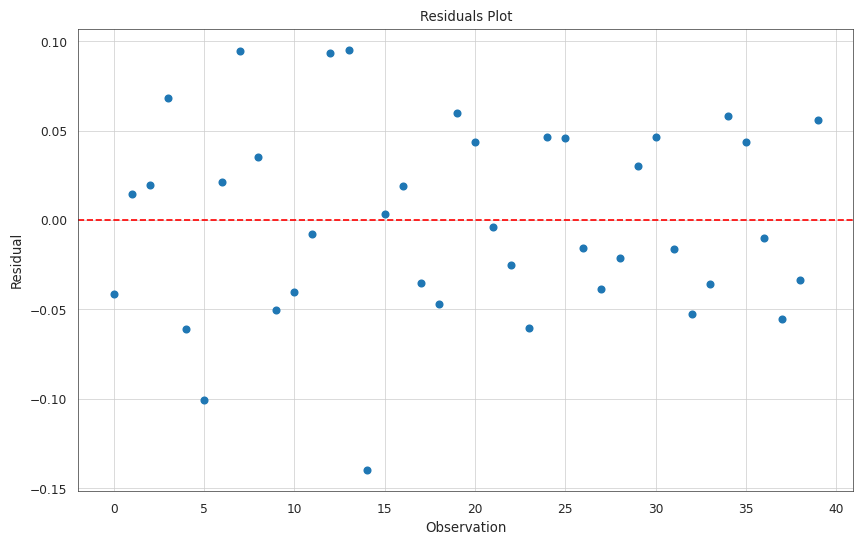

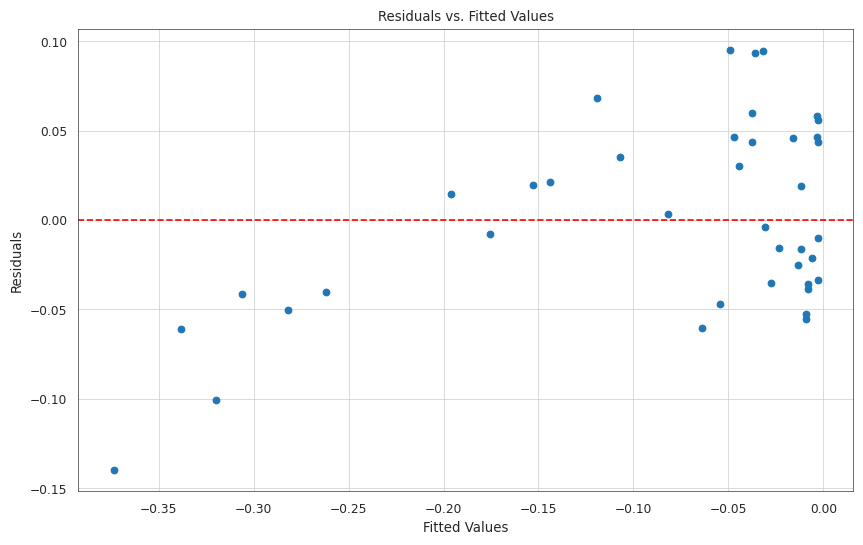

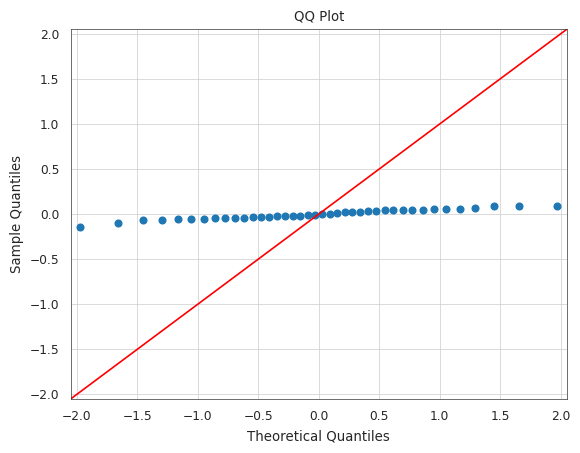

count    4.000000e+01
mean    -1.028691e-16
std      5.381679e-02
min     -1.397572e-01
25%     -3.921271e-02
50%     -6.106766e-03
75%      4.411144e-02
max      9.509033e-02
dtype: float64


In [100]:
check_residuals(mod2)

In [89]:
#the above model needs logging!!
data_before_aug['sqrt_mean'] = np.sqrt(data_before_aug['mean'])
mod3 = ols('sqrt_mean ~ C(number_of_images) + C(model)', data=data_before_aug).fit()
anova_table = sm.stats.anova_lm(mod3, typ=2)
print(anova_table)
print(mod3.summary())

                       sum_sq    df          F        PR(>F)
C(number_of_images)  0.277259   7.0  11.481382  8.768586e-07
C(model)             0.059962   4.0   4.345357  7.370880e-03
Residual             0.096594  28.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:              sqrt_mean   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     8.886
Date:                Mon, 27 May 2024   Prob (F-statistic):           1.57e-06
Time:                        15:20:46   Log-Likelihood:                 63.765
No. Observations:                  40   AIC:                            -103.5
Df Residuals:                      28   BIC:                            -83.26
Df Model:                          11                                         
Covariance Type:            nonrobust        

/tmp/ipykernel_22597/2927988504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_before_aug['sqrt_mean'] = np.sqrt(data_before_aug['mean'])


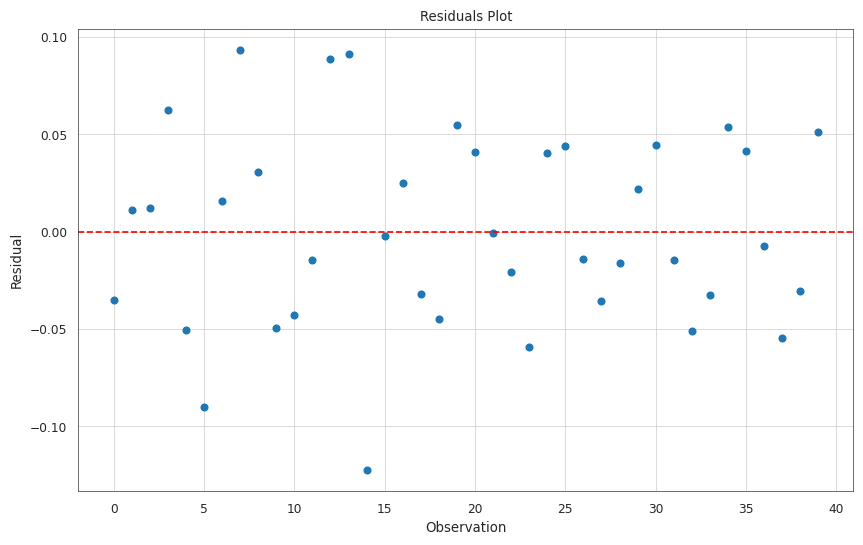

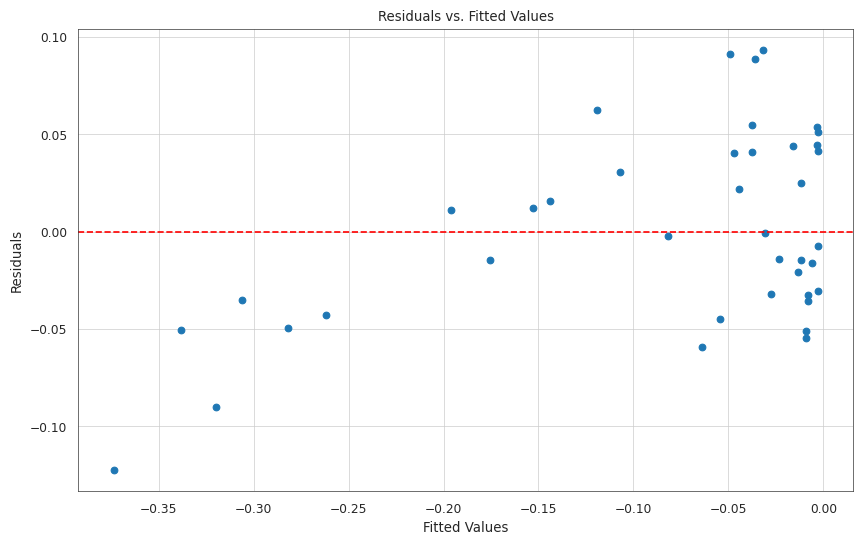

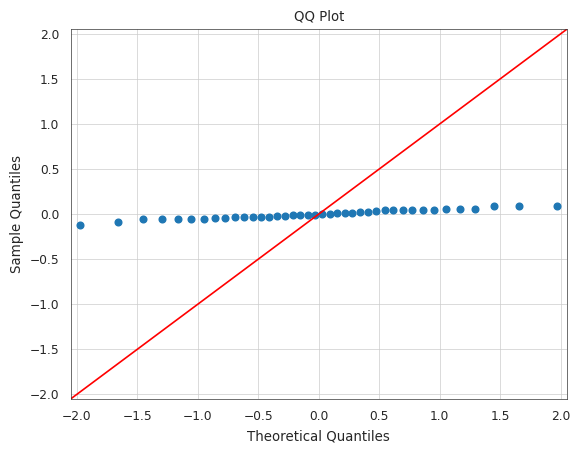

count    4.000000e+01
mean     1.054712e-16
std      4.976726e-02
min     -1.223508e-01
25%     -3.519892e-02
50%     -5.035179e-03
75%      4.091024e-02
max      9.321626e-02
dtype: float64


In [90]:
check_residuals(mod3)

In [95]:
#polynomial transformation
data_before_aug['sq_mean'] = data_before_aug['mean']**-2
mod4 = ols('sq_mean ~ C(number_of_images) + C(model)', data=data_before_aug).fit()
anova_table = sm.stats.anova_lm(mod4, typ=2)
print(anova_table)
print(mod4.summary())

                        sum_sq    df         F    PR(>F)
C(number_of_images)  26.157357   7.0  5.753968  0.000338
C(model)             10.072095   4.0  3.877318  0.012518
Residual             18.183874  28.0       NaN       NaN
                            OLS Regression Results                            
Dep. Variable:                sq_mean   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     5.072
Date:                Mon, 27 May 2024   Prob (F-statistic):           0.000247
Time:                        15:49:37   Log-Likelihood:                -40.991
No. Observations:                  40   AIC:                             106.0
Df Residuals:                      28   BIC:                             126.2
Df Model:                          11                                         
Covariance Type:            nonrobust                        

/tmp/ipykernel_22597/1514789891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_before_aug['sq_mean'] = data_before_aug['mean']**-2


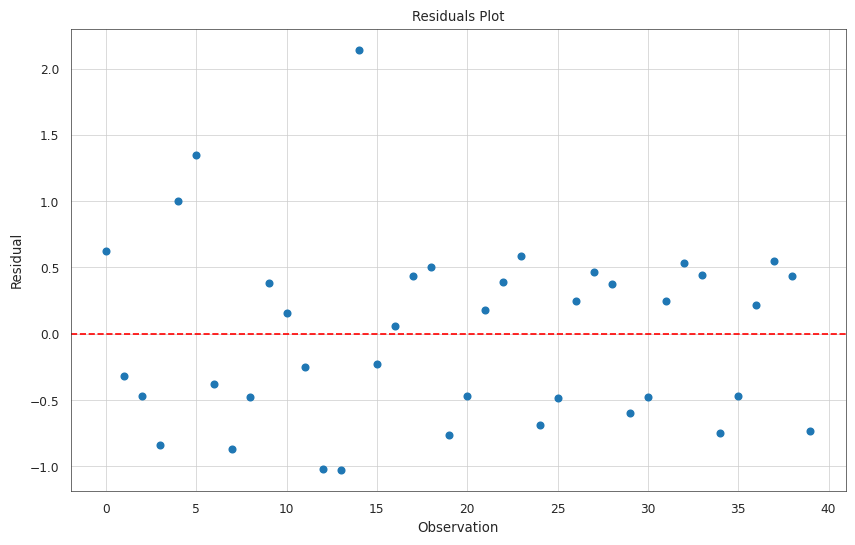

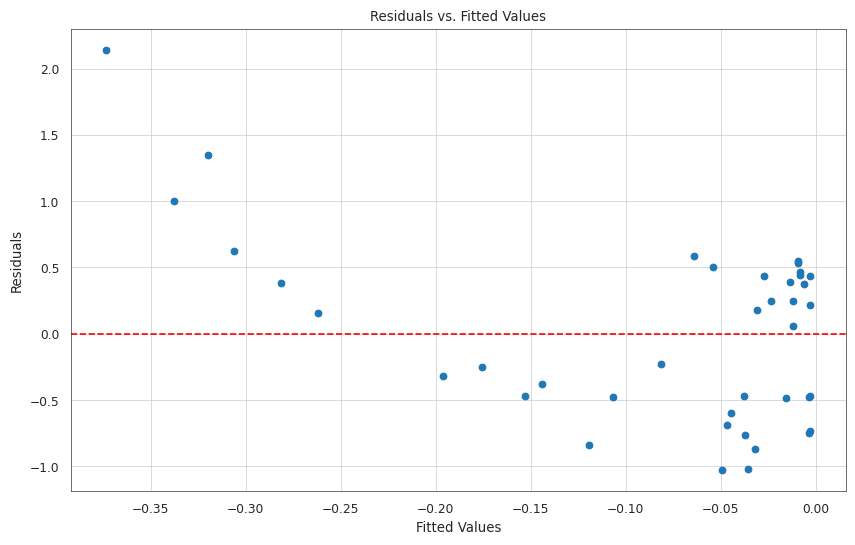

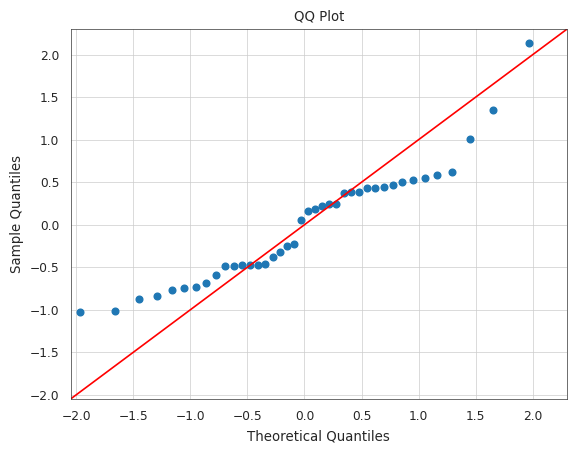

count    4.000000e+01
mean     1.842970e-15
std      6.828273e-01
min     -1.026471e+00
25%     -4.805735e-01
50%      1.079842e-01
75%      4.376361e-01
max      2.140330e+00
dtype: float64


In [96]:
check_residuals(mod4)

/tmp/ipykernel_22597/2041006494.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_before_aug['model_encoded'] = data_before_aug['model'].astype('category').cat.codes
/tmp/ipykernel_22597/2041006494.py:17: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      9.6259
Link Function:                     IdentityLink Log Likelihood:                                 -1469.2436
Number of Samples:                           40 AIC:                                              2959.739
                                                AICc:                                            2968.4466
                                                GCV:                                                0.0162
                                                Scale:                                              0.0094
                                                Pseudo R-Squared:                                   0.7715
Feature Function                  Lam

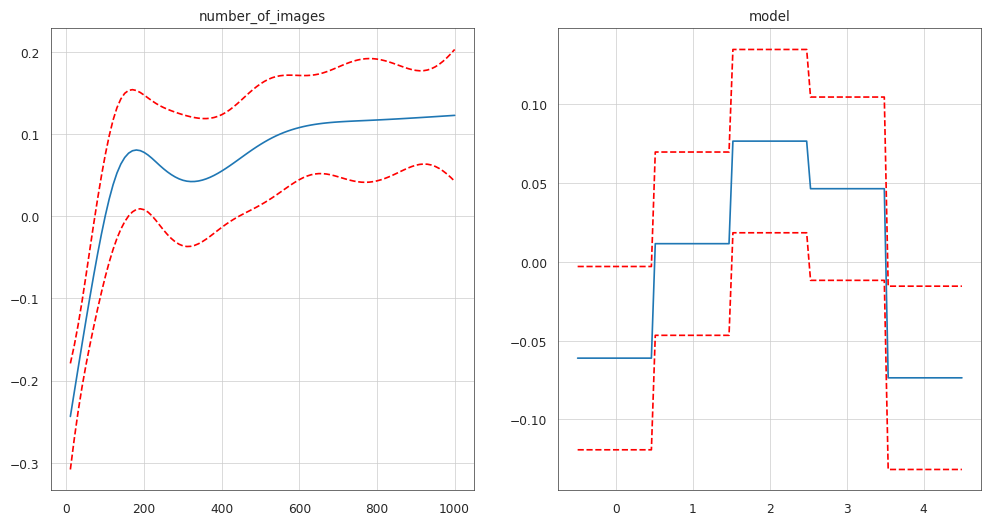

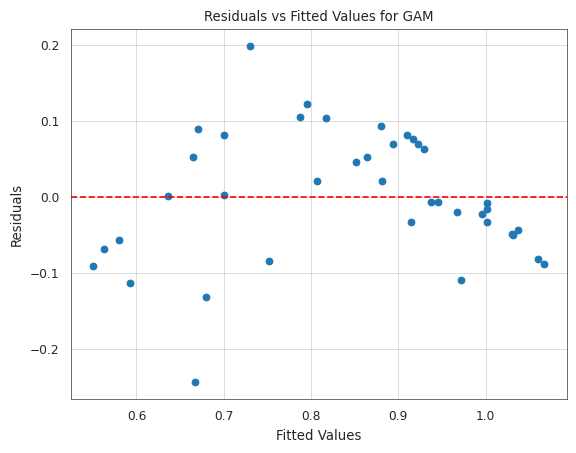

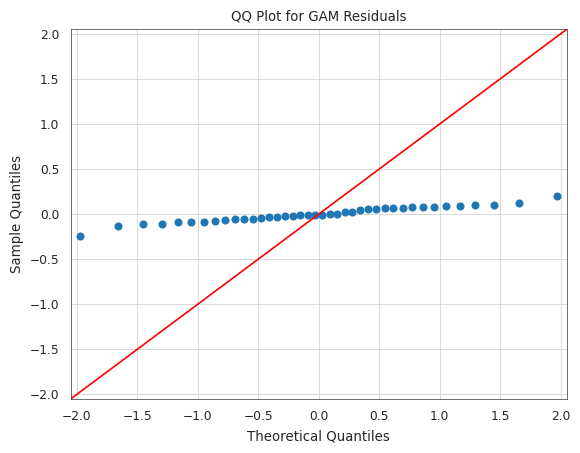

In [101]:
from pygam import LinearGAM, s, f
import numpy as np
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'data_before_aug'
# Transform the categorical variables for the model
data_before_aug['model_encoded'] = data_before_aug['model'].astype('category').cat.codes

# Prepare the features and target variable
X = data_before_aug[['number_of_images', 'model_encoded']]
y = data_before_aug['mean']

# Fit the GAM model
gam = LinearGAM(s(0) + f(1)).fit(X, y)

# Summary of the model
gam.summary()

# Plot the partial dependence
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
titles = ['number_of_images', 'model']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i])
plt.show()

# Residuals vs Fitted Values for GAM
fitted_values = gam.predict(X)
residuals = y - fitted_values
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values for GAM')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# QQ Plot for GAM residuals
sm.qqplot(residuals, line='45')
plt.title('QQ Plot for GAM Residuals')
plt.show()


In [110]:
#logit transformation
from scipy.special import logit, expit

data_before_aug['logit_mean'] = logit(data_before_aug['mean'])
mod5 = ols('logit_mean ~ C(number_of_images) + C(model)', data=data_before_aug).fit()
anova_table = sm.stats.anova_lm(mod5, typ=2)
print(anova_table)
print(mod5.summary())

                        sum_sq    df          F        PR(>F)
C(number_of_images)  87.598390   7.0  21.784838  9.347466e-10
C(model)              4.701324   4.0   2.046051  1.150064e-01
Residual             16.084286  28.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:             logit_mean   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     14.61
Date:                Tue, 28 May 2024   Prob (F-statistic):           7.81e-09
Time:                        11:23:43   Log-Likelihood:                -38.537
No. Observations:                  40   AIC:                             101.1
Df Residuals:                      28   BIC:                             121.3
Df Model:                          11                                         
Covariance Type:            nonrobust    

/tmp/ipykernel_22597/2839327722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_before_aug['logit_mean'] = logit(data_before_aug['mean'])


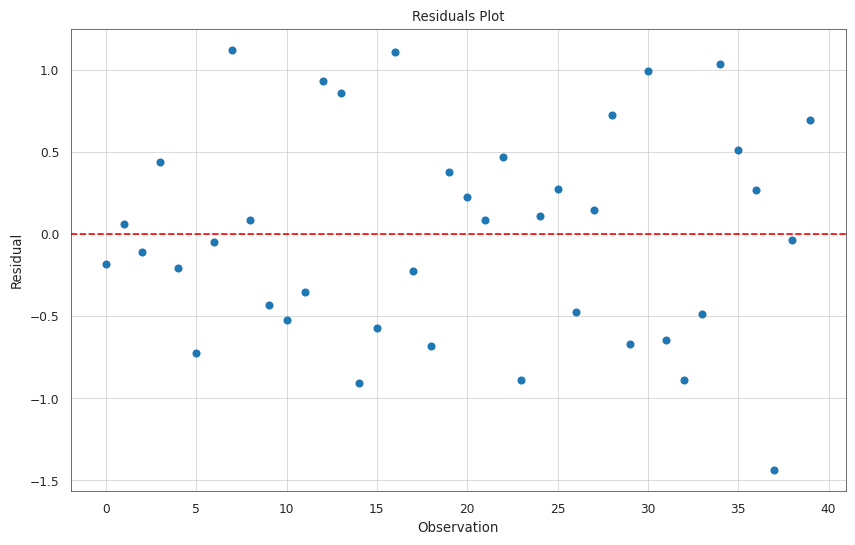

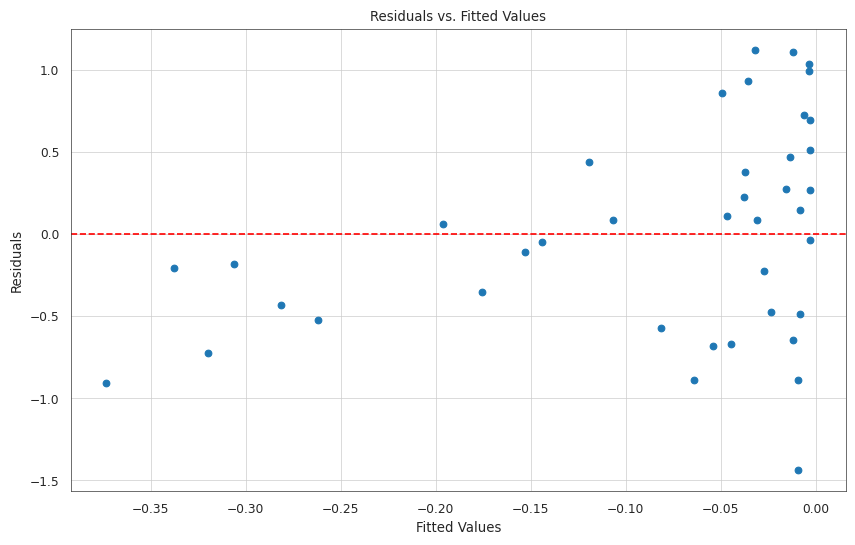

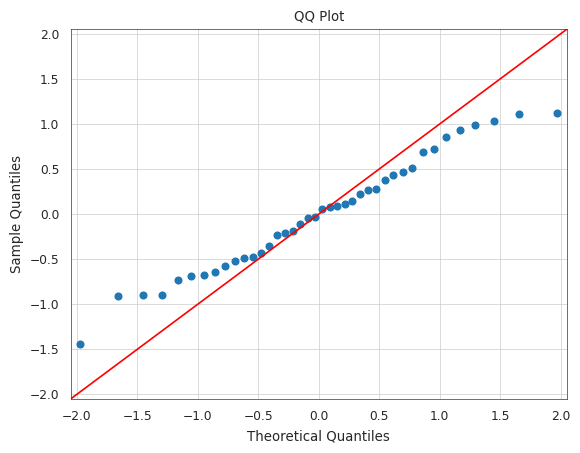

count    4.000000e+01
mean    -9.409140e-16
std      6.421975e-01
min     -1.437351e+00
25%     -4.990488e-01
50%      1.184864e-02
75%      4.455138e-01
max      1.120995e+00
dtype: float64


In [103]:
check_residuals(mod5)

In [105]:
from statsmodels.formula.api import glm

# data_before_aug['bounded_mean'] = data_before_aug['mean'].clip(1e-10, 1-1e-10)
glm = glm('mean ~ C(number_of_images) + C(model)',
          data=data_before_aug,
          family=sm.families.Binomial()).fit()
print(glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   mean   No. Observations:                   40
Model:                            GLM   Df Residuals:                       28
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9.4135
Date:                Tue, 28 May 2024   Deviance:                      0.83903
Time:                        11:20:59   Pearson chi2:                    0.924
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1828
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

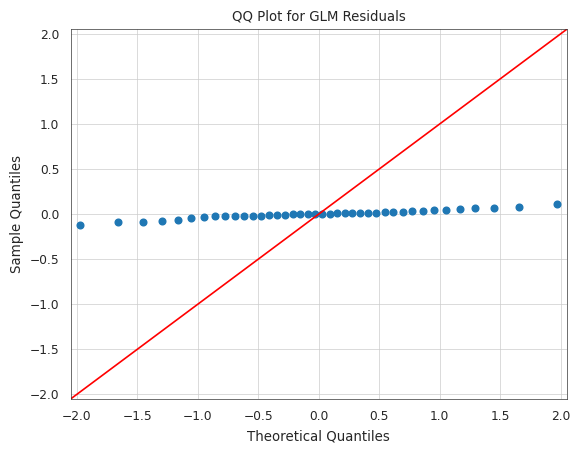

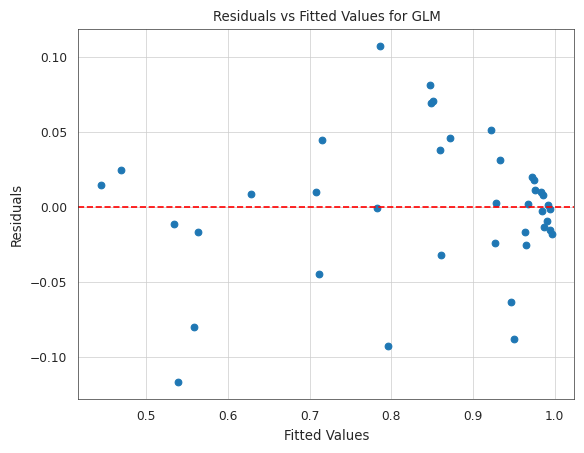

In [108]:
# QQ Plot for GLM residuals
sm.qqplot(glm.resid_response, line='45')
plt.title('QQ Plot for GLM Residuals')
plt.show()

# Residuals vs Fitted Values for GLM
fitted_values = glm.fittedvalues
residuals = glm.resid_response
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values for GLM')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

### Tukey

In [22]:
#model tukey
tukey = pairwise_tukeyhsd(endog=data_before_aug['mean'],
                          groups=data_before_aug['model'],
                          alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
yolov8l yolov8m   0.0781 0.9001 -0.1752 0.3314  False
yolov8l yolov8n    0.148 0.4588 -0.1053 0.4013  False
yolov8l yolov8s   0.1156 0.6858 -0.1377 0.3689  False
yolov8l yolov8x  -0.0134 0.9999 -0.2667 0.2399  False
yolov8m yolov8n     0.07 0.9306 -0.1833 0.3232  False
yolov8m yolov8s   0.0375 0.9928 -0.2158 0.2908  False
yolov8m yolov8x  -0.0915 0.8357 -0.3448 0.1618  False
yolov8n yolov8s  -0.0325 0.9959 -0.2857 0.2208  False
yolov8n yolov8x  -0.1615 0.3718 -0.4147 0.0918  False
yolov8s yolov8x   -0.129 0.5917 -0.3823 0.1243  False
-----------------------------------------------------


In [23]:
#number of images tukey
tukey = pairwise_tukeyhsd(endog=data_before_aug['mean'],
                          groups=data_before_aug['number_of_images'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  10.0   20.0   0.0755 0.9633 -0.1583 0.3093  False
  10.0   50.0   0.0798  0.951 -0.1541 0.3136  False
  10.0  100.0   0.2977 0.0054  0.0639 0.5315   True
  10.0  250.0   0.3051 0.0041  0.0713 0.5389   True
  10.0  500.0    0.346 0.0009  0.1122 0.5798   True
  10.0  750.0    0.373 0.0003  0.1392 0.6069   True
  10.0 1000.0     0.38 0.0002  0.1462 0.6138   True
  20.0   50.0   0.0043    1.0 -0.2295 0.2381  False
  20.0  100.0   0.2222  0.072 -0.0116 0.4561  False
  20.0  250.0   0.2296 0.0572 -0.0042 0.4635  False
  20.0  500.0   0.2705 0.0144  0.0367 0.5043   True
  20.0  750.0   0.2976 0.0054  0.0637 0.5314   True
  20.0 1000.0   0.3045 0.0042  0.0707 0.5383   True
  50.0  100.0    0.218 0.0821 -0.0159 0.4518  False
  50.0  250.0   0.2254 0.0654 -0.0085 0.4592  False
  50.0  500.0   0.2662 0.0167  0.0324 0.5001   True
  50.0  750.

## Augmentation

In [34]:
from scipy.stats import f_oneway

f_oneway(data_after_aug['mean'][data_after_aug['augmented']=='No'],
         data_after_aug['mean'][data_after_aug['augmented']=='Yes'])

F_onewayResult(statistic=0.5404428144194962, pvalue=0.4667624162260483)

In [35]:
#augmented tukey
tukey = pairwise_tukeyhsd(endog=data_after_aug['mean'],
                          groups=data_after_aug['augmented'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    No    Yes   0.0316 0.4668 -0.0555 0.1188  False
---------------------------------------------------
